<a href="https://colab.research.google.com/github/m-bashari-m/vehicle-color-recognition/blob/main/src/rgb_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/m-bashari-m/vehicle-color-recognition/main/src/utils.py

--2022-06-01 19:20:20--  https://raw.githubusercontent.com/m-bashari-m/vehicle-color-recognition/main/src/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8912 (8.7K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]   8.70K  --.-KB/s    in 0s      

2022-06-01 19:20:20 (105 MB/s) - ‘utils.py’ saved [8912/8912]



In [2]:
from google.colab import drive
drive.mount('./drive')

Mounted at ./drive


In [3]:
import pandas as pd
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

from utils import ModelCreator, get_train_val_ds, ErrorAnalyzer, get_class_weight

In [4]:
BATCH_SIZE = 32
IMG_SIZE = (512, 512)
AUTOTUNE = tf.data.AUTOTUNE
N_CLASSES = 16
HUB_URL = 'https://tfhub.dev/google/bit/m-r50x1/1'

In [5]:
dataset_dir = os.path.join('drive', 'MyDrive', 'cars')
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')

In [6]:
train_ds, val_ds = get_train_val_ds(train_dir, val_dir, batch_size=BATCH_SIZE)

Found 17043 files belonging to 16 classes.
Found 3495 files belonging to 16 classes.


In [7]:
classes, class_weight = get_class_weight()

In [8]:
for color, weight in zip(classes, class_weight.values()):
  print(color, "    \t=>", weight)

beige     	=> 17.94
black     	=> 13.8
blue     	=> 15.47
brown     	=> 17.92
cream     	=> 56.81
crimson     	=> 76.43
gold     	=> 56.81
green     	=> 21.2
grey     	=> 12.41
navy-blue     	=> 58.77
orange     	=> 22.37
red     	=> 16.39
silver     	=> 20.17
titanium     	=> 56.81
white     	=> 2.97
yellow     	=> 20.68


In [8]:
train_ds = (
    train_ds.
    map(lambda img, lbl: (img/255., lbl), num_parallel_calls=AUTOTUNE).
    prefetch(AUTOTUNE))

val_ds = (
    val_ds.
    map(lambda img, lbl: (img/255., lbl), num_parallel_calls=AUTOTUNE).
    prefetch(AUTOTUNE))

In [9]:
rgb_creator = ModelCreator(HUB_URL, 'RGB-model')
rgb_model = rgb_creator.make_model()
callbacks = rgb_creator.get_callbacks()

Model: "RGB-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23500352  
                                                                 
 dense (Dense)               (None, 600)               1229400   
                                                                 
 dropout (Dropout)           (None, 600)               0         
                                                                 
 dense_1 (Dense)             (None, 16)                9616      
                                                                 
Total params: 24,739,368
Trainable params: 1,239,016
Non-trainable params: 23,500,352
_________________________________________________________________


In [ ]:
history = rgb_model.fit(train_ds,
                        callbacks=callbacks,
                        epochs=10,
                        class_weight=class_weight)

Epoch 1/10
 11/533 [..............................] - ETA: 1:47:49 - loss: 5569.9946 - precision: 0.0966 - recall: 0.0966 - auc: 0.0713 - accuracy: 0.0966

In [ ]:
analyzer = ErrorAnalyzer(model=rgb_model, model_name='RGB-model', ds=val_ds, classes=classes)

Making confusion matrix:


  0%|          | 0/110 [00:00<?, ?it/s]

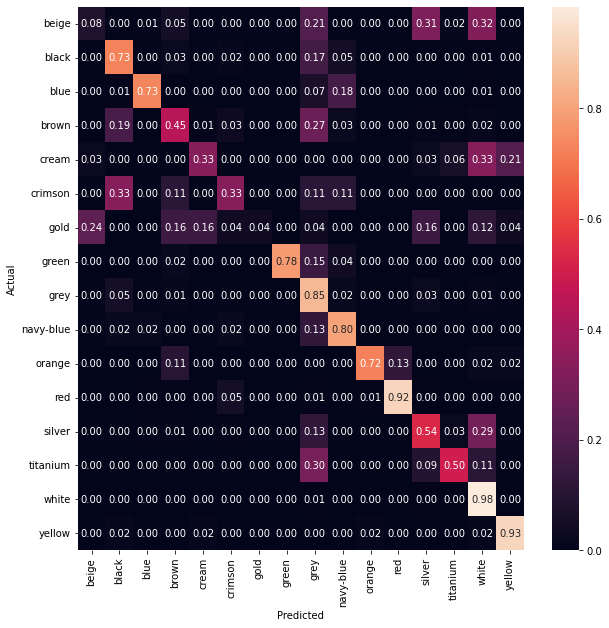

In [ ]:
analyzer.plot_confusion_mat()

In [ ]:
analyzer.evaluate_model()

Calculating error type...
Writing in log file...
All done. Check log file => RGB-model.csv
